# **Project**: Music Genre Classification using Neural Networks

Presented By: ISHA SHRIVASTAVA

### **Project Type: Supervised Learning (EDA, Neural Networks (CNN))**

# Project Summary:


In summary, while data was prepared and explored effectively, classifying a large number of music genres accurately with the current audio features alone is challenging. Future work could involve more advanced feature engineering, different model architectures, or reducing the number of genres.

## Project Objective

* * *

The primary objective is to build a robust music genre classification system using machine learning. This system aims to automatically classify music genres based on audio features to improve functionalities like personalized recommendations and content organization on music streaming platforms.

## Data

* * *

The project utilizes the "spotify-dataset-114k-songs" dataset from Kaggle Hub. This dataset contains various audio features and genre labels for a large collection of songs, providing a diverse source for analysis and model training.

## Methodology

* * *

The project follows a standard machine learning workflow, starting with:

1.  **Problem Understanding:** Defining the project objective and relevant business/research questions.
2.  **Data Collection:** Downloading the dataset from Kaggle Hub.
3.  **Data Inspection & Overview:** Loading the dataset, checking its shape, identifying data types, understanding limitations, and getting a general overview of the data.
4.  **Data Cleaning:** Handling missing values (imputing with 'Unknown' for categorical and median for numerical) and dropping duplicates. The notebook also includes steps for detecting and treating outliers in numerical features using the IQR method and capping.
5.  **Exploratory Data Analysis (EDA):**
    *   **Univariate Analysis:** Visualizing the distribution of numerical features using histograms and boxplots, and examining the value counts and bar charts for categorical features.
    *   **Bivariate / Multivariate Analysis:** Analyzing relationships between numerical features using correlation heatmaps and scatterplots, and exploring relationships between categorical and numerical features using boxplots (specifically, popularity by top genres). The notebook also includes an attempt to analyze relationships between categorical features using cross-tabulations and stacked bar charts, though this part encountered an error during execution.


6.  **Feature Engineering:** Creating new features from existing ones if necessary.
7.  **Data Preprocessing:** Preparing the data for model training, including encoding categorical variables and scaling numerical features.
8.  **Model Selection:** Choosing appropriate machine learning or deep learning models for music genre classification, including exploring the use of Convolutional Neural Networks (CNNs).
9.  **Model Training:** Training the selected models, including the CNN model, on the preprocessed data.
10.  **Model Evaluation:** Evaluating the performance of the trained models using relevant metrics.

**Business/Research Questions**

Based on the project objective, here are some relevant business/research questions:

*   Can we accurately classify the genre of a song using its audio features?
*   Which audio features are most important for determining a song's genre?
*   How can this genre classification system be used to improve personalized music recommendations?
*   Can we identify patterns in audio features that are characteristic of specific genres?
*   How does the popularity of a song relate to its genre and audio features?

**Gather Data**

The data for this project is sourced from Kaggle Hub. The dataset is downloaded as a CSV file containing various audio features and genre labels for a large collection of songs.



### **Setup & Environment**

---

Colab runtime:Runtime-> Change runtime type->GPU---

# **Let's Begin!**

# **Exploratory Data Analysis**

In [ ]:
# Install required packages
!pip install pandas numpy scikit-learn matplotlib plotly tensorflow joblib


**Install kaggle library**

In [ ]:
!pip install kagglehub

Import libraries

In [ ]:
# Core
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Deep Learning (CNN)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Utilities
import warnings
warnings.filterwarnings('ignore')


## **Data Collection**

Download Dataset Via Kagglehub

In [ ]:
import kagglehub
import os

path=kagglehub.dataset_download("priyamchoksi/spotify-dataset-114k-songs")
print("Path to dataset files:", path)

DATA_DIR = os.path.join(path, 'dataset.csv')
assert os.path.exists(DATA_DIR), f"Dataset not found at {DATA_DIR}"
print("Dataset found at:", DATA_DIR)

Using Colab cache for faster access to the 'spotify-dataset-114k-songs' dataset.
Path to dataset files: /kaggle/input/spotify-dataset-114k-songs
Dataset found at: /kaggle/input/spotify-dataset-114k-songs/dataset.csv


**Identify Data Types**

The dataset contains the following data types:

*   **Numeric:** Features like popularity, duration\_ms, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo are numerical.
*   **Categorical:** Features like explicit, key, mode, time\_signature, and track\_genre are categorical. 'track\_genre' is the target variable.
*   **Text:** Features like track\_id, artists, album\_name, and track\_name are text-based identifiers or names.

**Data Limitations**

*   Missing values in some metadata columns ('artists',            'album_name', 'track_name').
*   Potential bias as the data is from Spotify only.
*   Limited to provided audio features; other features (e.g., lyrics) are not included.
*   Static dataset, may not reflect evolving music trends.

## **Data Inspection & Overview**

Load the dataset

In [ ]:
import pandas as pd

df=pd.read_csv(os.path.join(path, 'dataset.csv'))
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

Check shape

In [ ]:
# Display the shape of dataframe
print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (114000, 21)


Check unique values for categorical features

In [ ]:
# Check unique values for categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'track_id': 89741 unique values
Column 'artists': 31437 unique values
Column 'album_name': 46589 unique values
Column 'track_name': 73608 unique values
Column 'track_genre': 114 unique values


Feature information

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Describing dataset

In [ ]:

df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

## **Data Cleaning**

replace "None" with NaN

In [ ]:
# replace "None" with NaN

df = df.replace("None", np.nan)

strip spaces & standardize categories

In [ ]:
#  strip spaces & standardize categories

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.lower()

Drop empty/unusable columns

In [ ]:
# Drop empty/unusable columns
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop duplicates if any
df=df.drop_duplicates()

Finding total null values in each column

In [ ]:
#null values in the dataset

df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Total unique values in the dataframe

In [ ]:
# Total unique values in the dataframe

df.nunique()

track_id            89741
artists             31428
album_name          46155
track_name          72396
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

Check unique categories per feature

In [ ]:
# Check unique categories per feature
print("Number of unique values per column:")
print(df.nunique())

Number of unique values per column:
track_id            89741
artists             31428
album_name          46155
track_name          72396
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64


Check missing values

In [ ]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 artists       1
album_name    1
track_name    1
dtype: int64


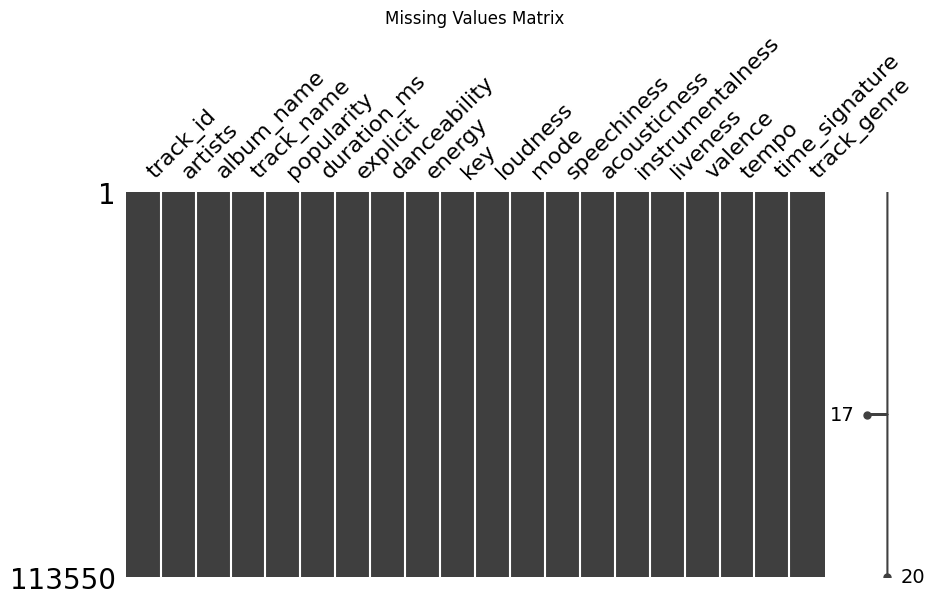

In [ ]:
#visualizing the missing values using missingno
import missingno as msno

msno.matrix(df, figsize=(10,5))
plt.title('Missing Values Matrix')
plt.show()

Handle missing values (drop/impute temporary for analysis)

In [ ]:

df['artists'] = df['artists'].fillna('Unknown')
df['album_name'] = df['album_name'].fillna('Unknown')
df['track_name'] = df['track_name'].fillna('Unknown')

# For numerical columns, fill missing values with the median (if any)
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Finding total duplicates in the dataset

In [ ]:
# Duplicates in the dataset

duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


Detect And Treat Outliers

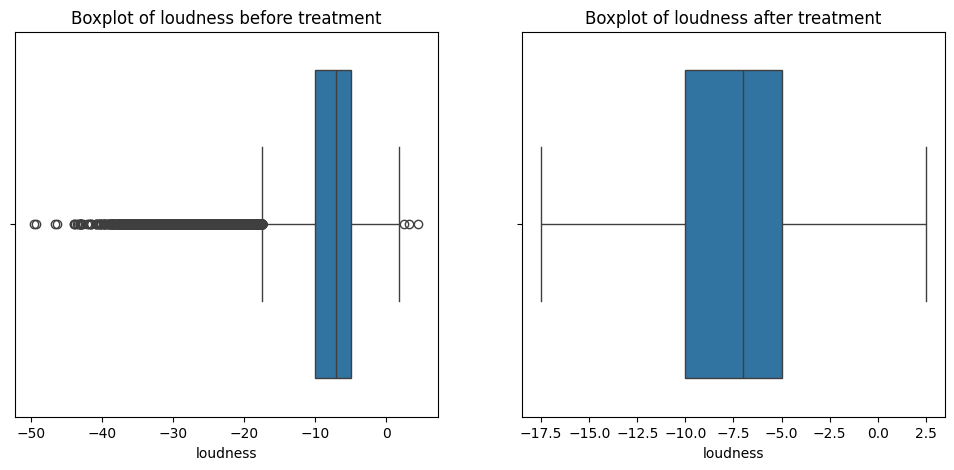

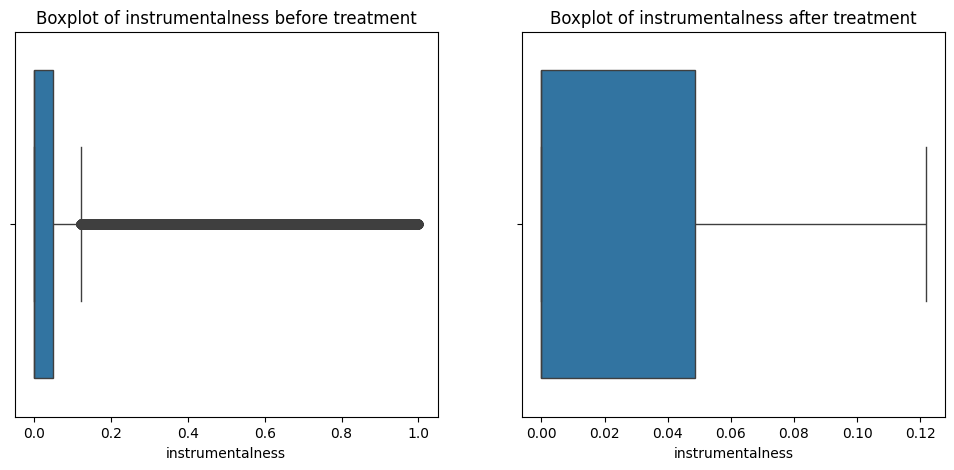

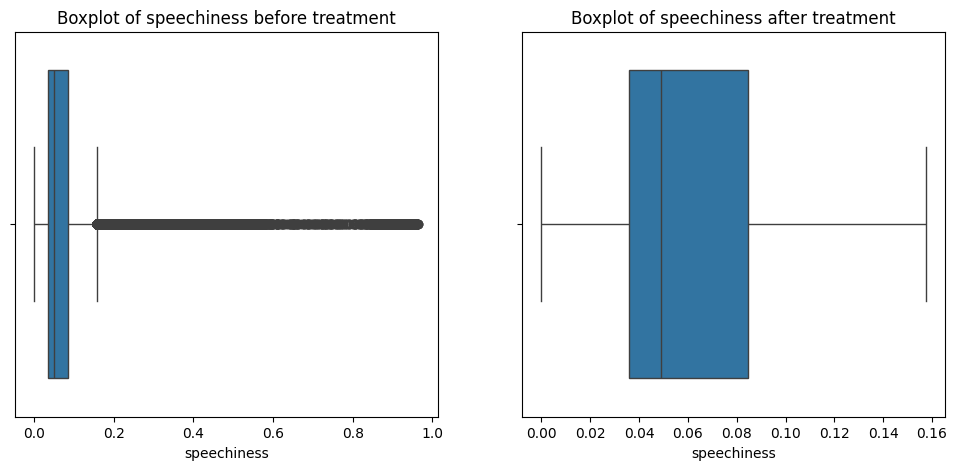

In [ ]:
# convert numeric columns properly
# Select only numeric columns for outlier treatment
numeric_df = df.select_dtypes(include=np.number)

# save copy before treatment
df_before = numeric_df.copy()

# functions to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Treat outliers by capping (winsorization)
def treat_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# List of columns to visualize outliers for
columns_to_visualize = ['loudness', 'instrumentalness', 'speechiness']


# visualization:boxplots before vs after
# Iterate through the selected numeric columns for visualization and treatment
for col in columns_to_visualize:
    # Make sure the column exists and is numeric and has non-null values
    if col in numeric_df.columns and pd.api.types.is_numeric_dtype(numeric_df[col]) and not numeric_df[col].isnull().all():
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.boxplot(x=df_before[col], ax=axes[0]) # Use df_before for the 'before' plot
        axes[0].set_title(f'Boxplot of {col} before treatment')

        # Apply outlier treatment to a copy of the numeric data for the 'after' plot
        numeric_df_after = treat_outliers(numeric_df.copy(), col)
        sns.boxplot(x=numeric_df_after[col], ax=axes[1])
        axes[1].set_title(f'Boxplot of {col} after treatment')

        plt.show()
    elif col not in numeric_df.columns:
        print(f"Warning: Column '{col}' not found in the numeric data.")
    elif not pd.api.types.is_numeric_dtype(numeric_df[col]):
        print(f"Warning: Column '{col}' is not numeric.")
    elif numeric_df[col].isnull().all():
        print(f"Warning: Column '{col}' contains only null values.")


# After the loop, apply outlier treatment to the original df for all numeric columns
# This ensures the original df is updated with capped outliers for subsequent steps
for col in numeric_df.columns:
     if not df[col].isnull().all(): # Check if the column in the original df has non-null values
        df = treat_outliers(df, col)

Numerical: histograms, boxplots

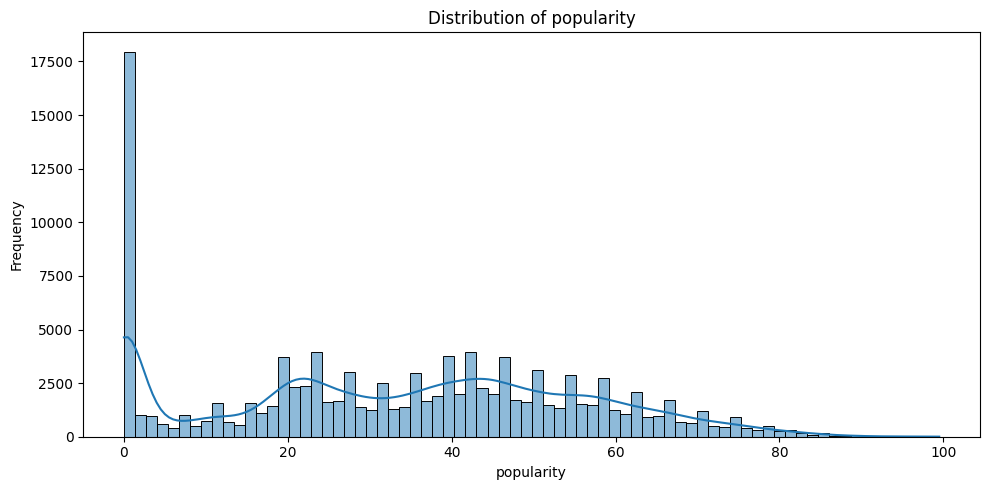

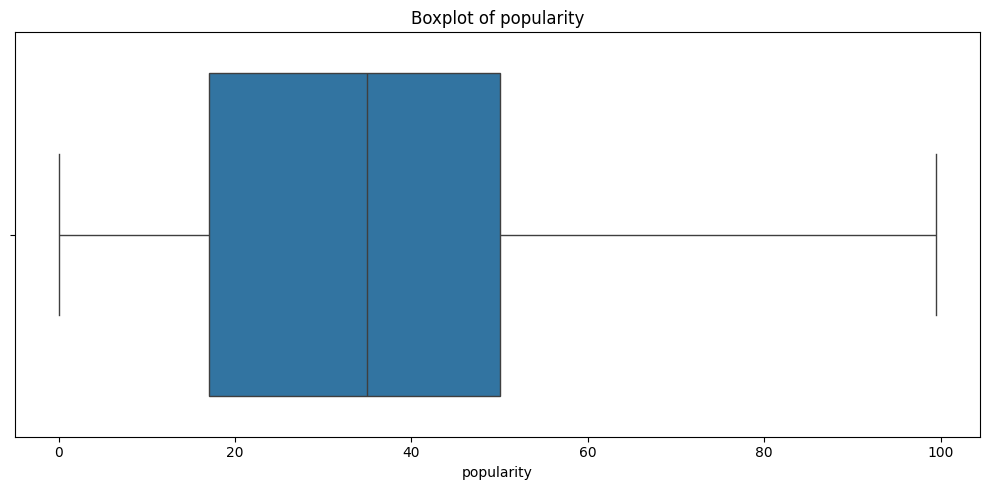

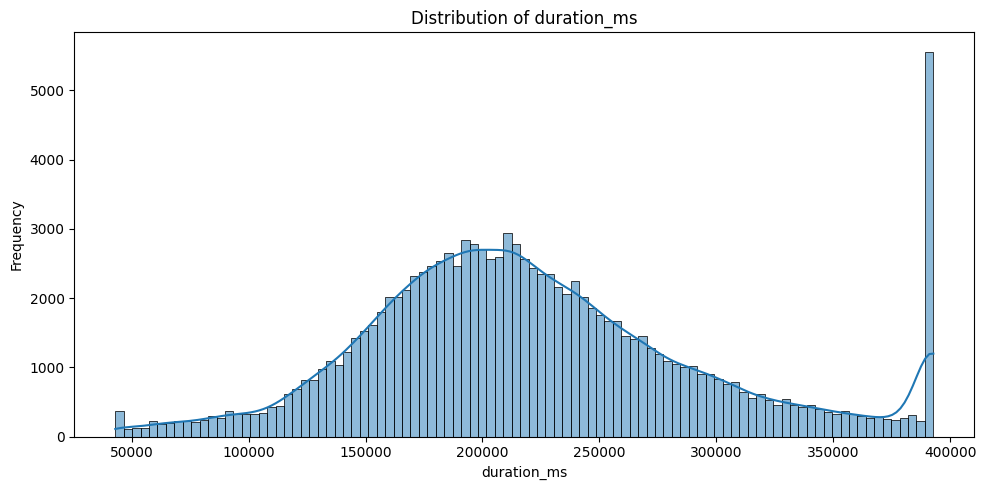

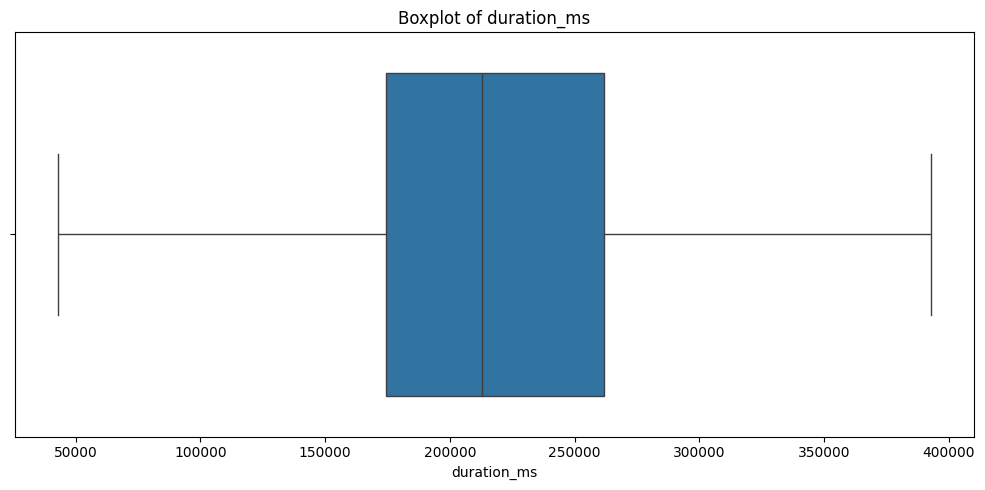

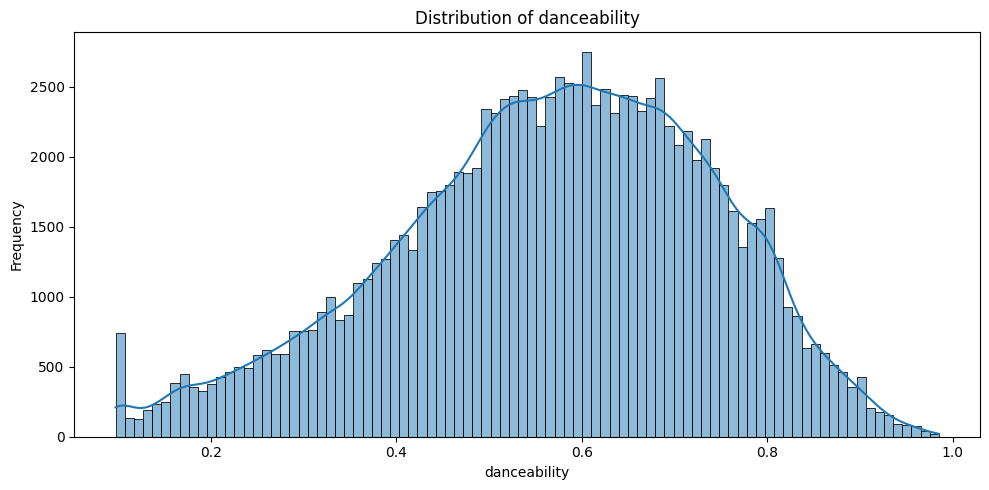

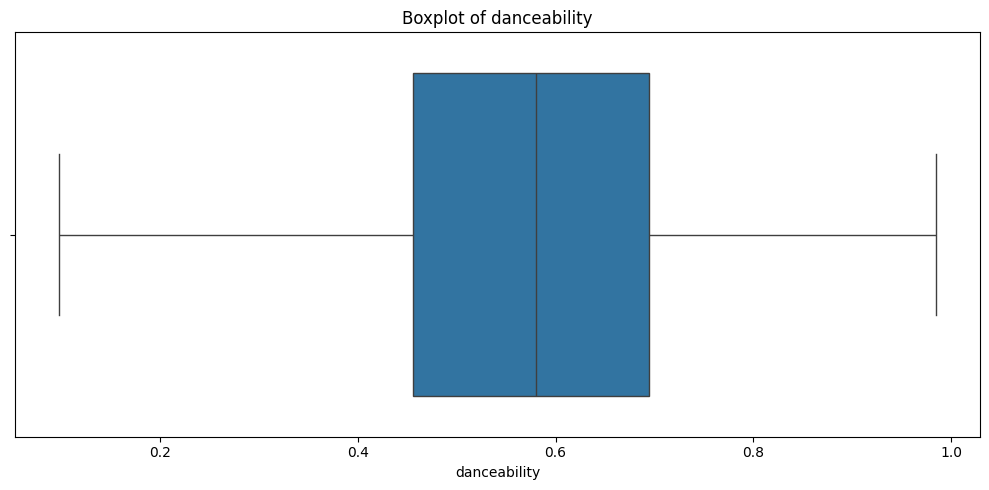

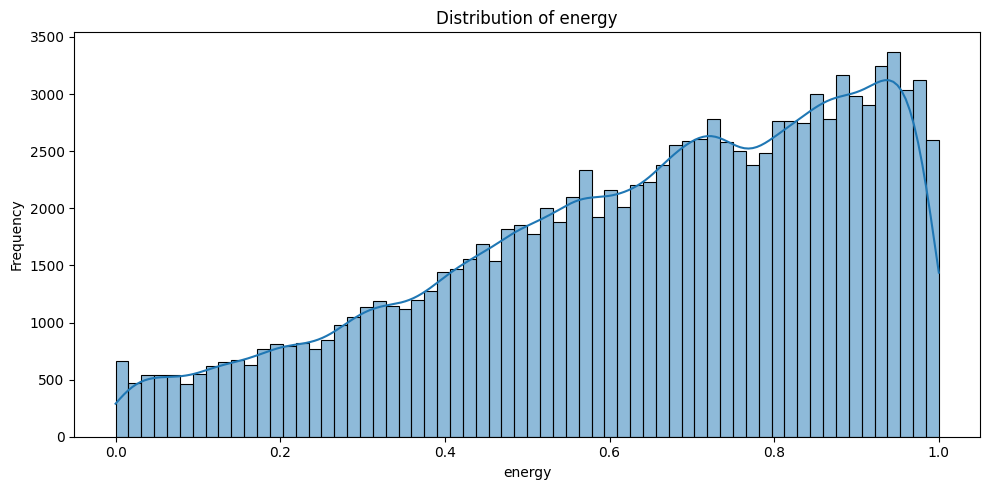

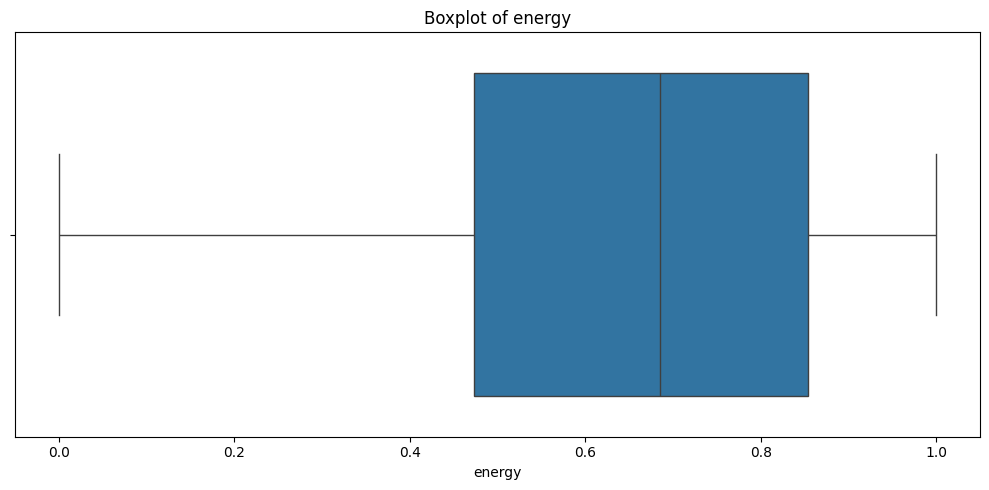

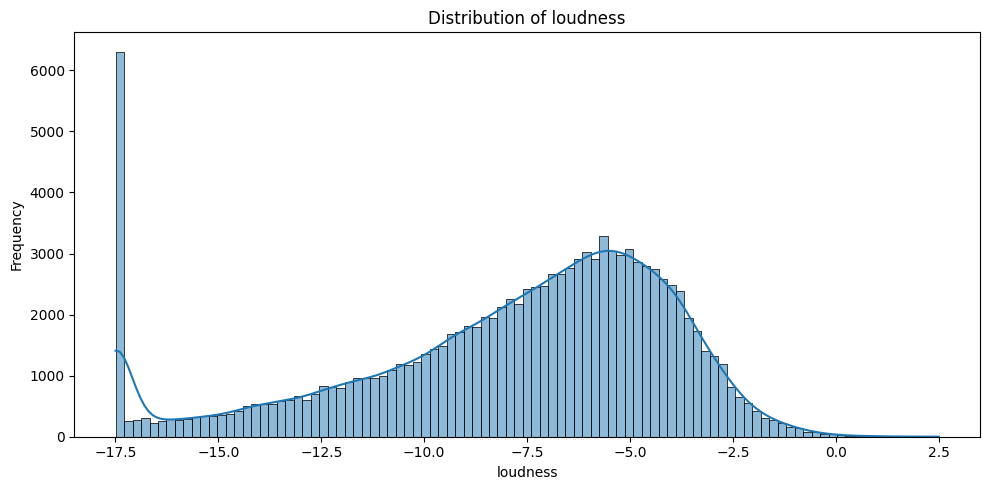

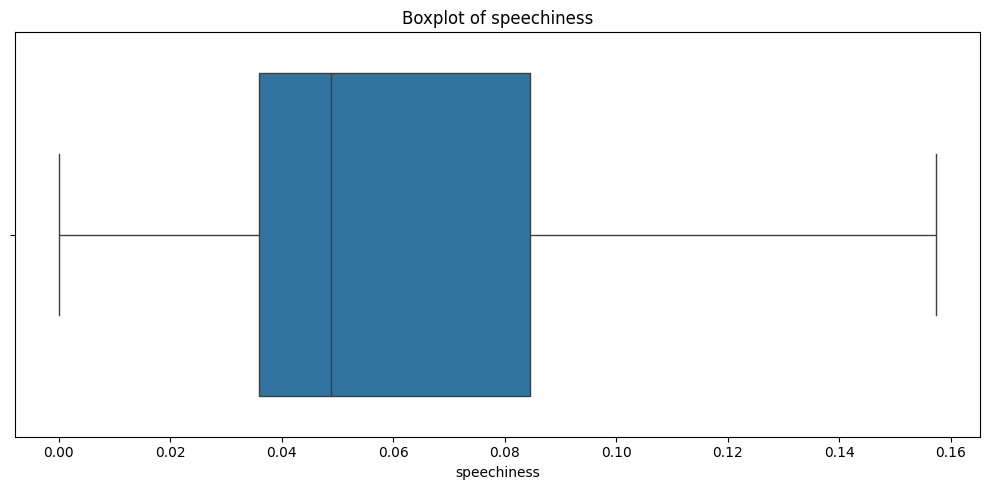

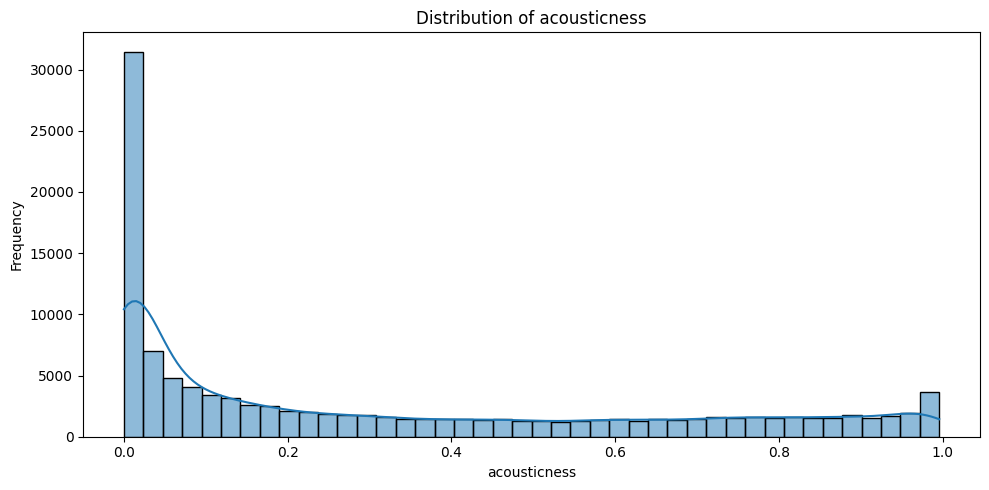

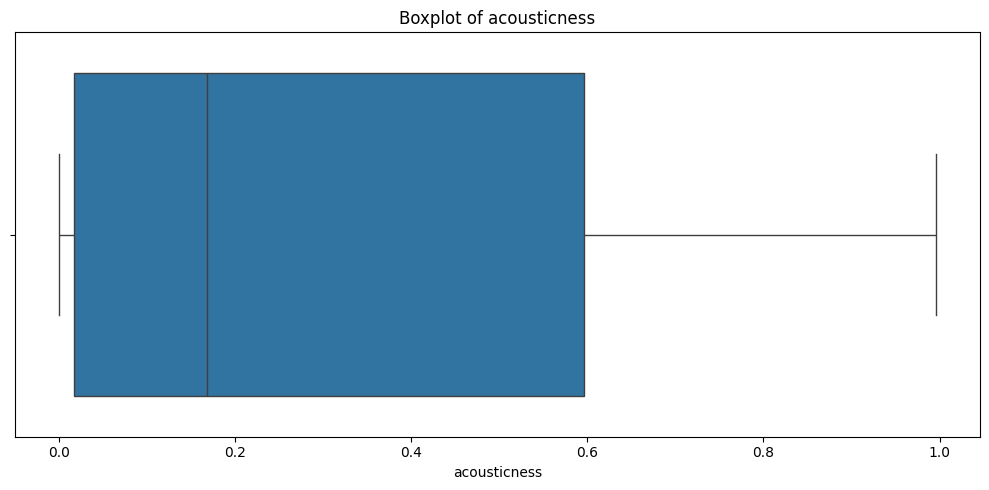

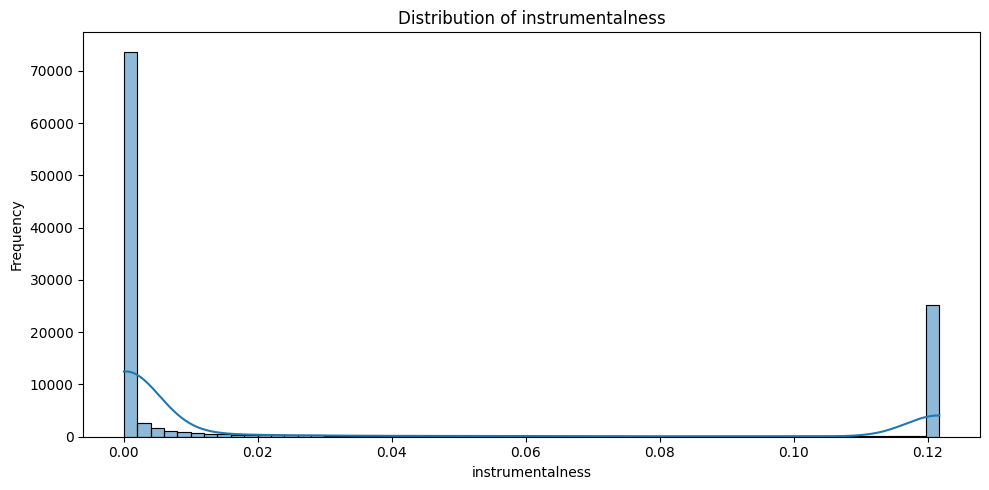

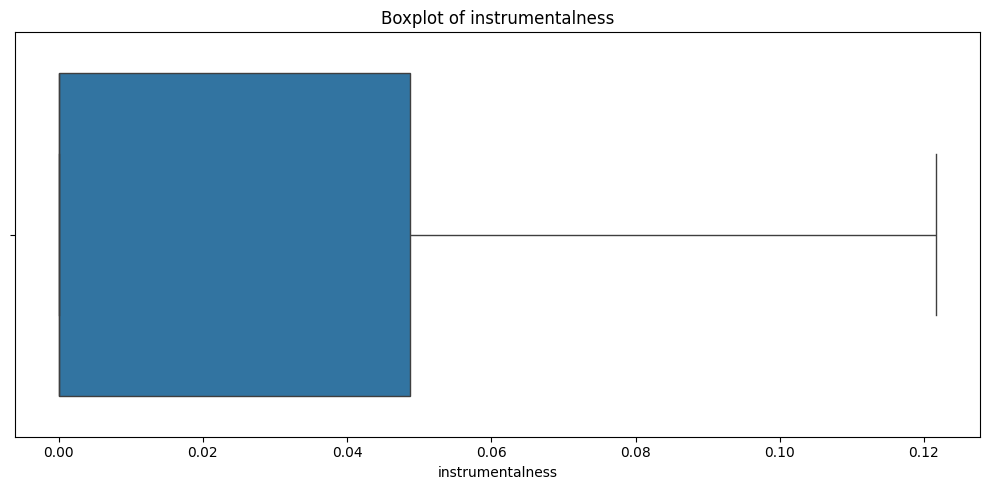

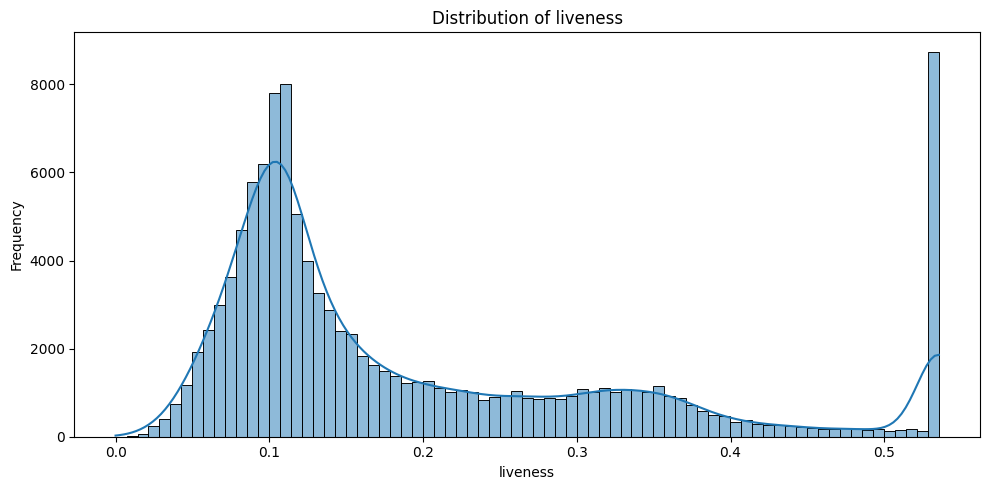

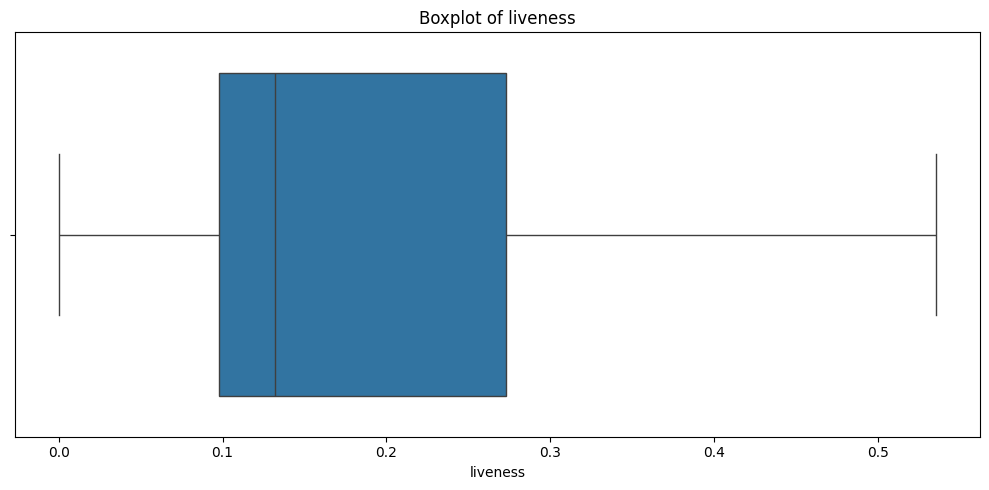

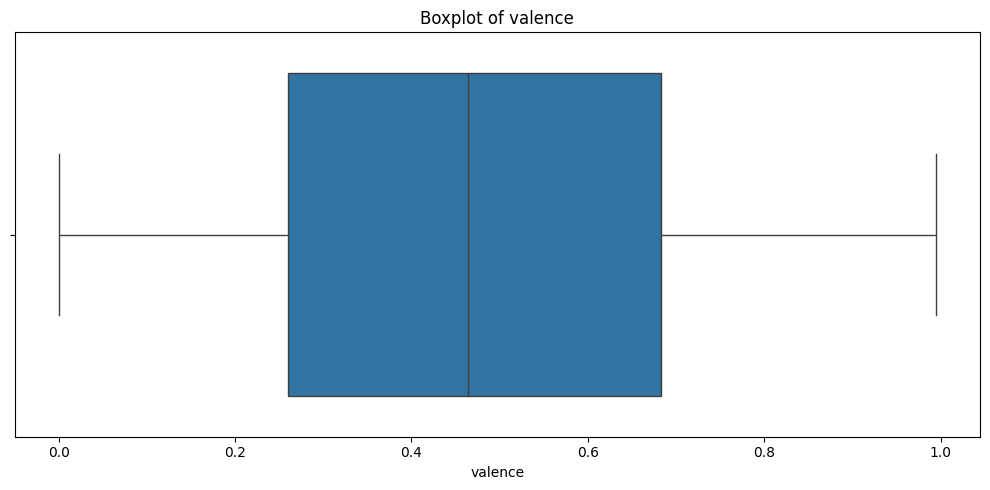

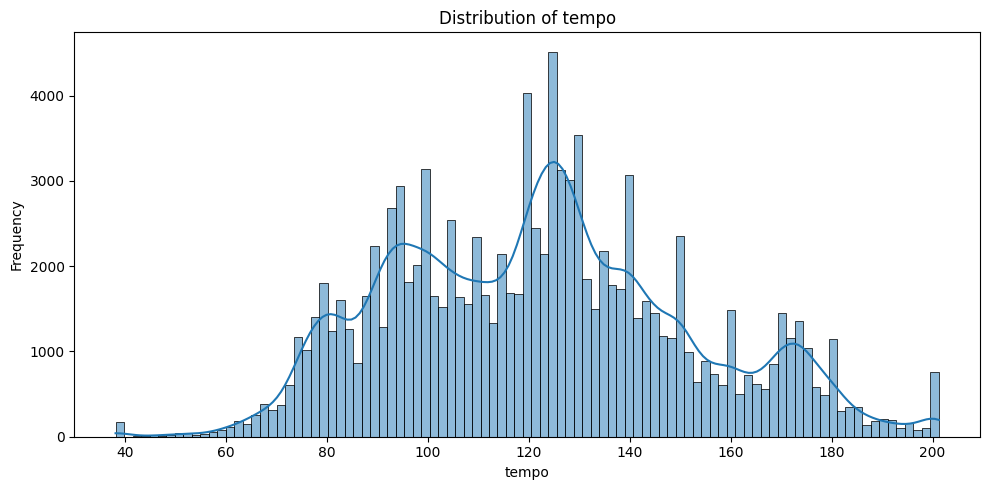

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

# Define figure size for plots
fig_width = 10
fig_height = 5

for col in numeric_cols:
    # Skip columns that are not suitable for these plots
    if col in ['Unnamed: 0', 'key', 'mode', 'time_signature']:
        continue

    # Histogram
    plt.figure(figsize=(fig_width, fig_height))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

    # Boxplot
    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

Categorical: value counts, bar charts

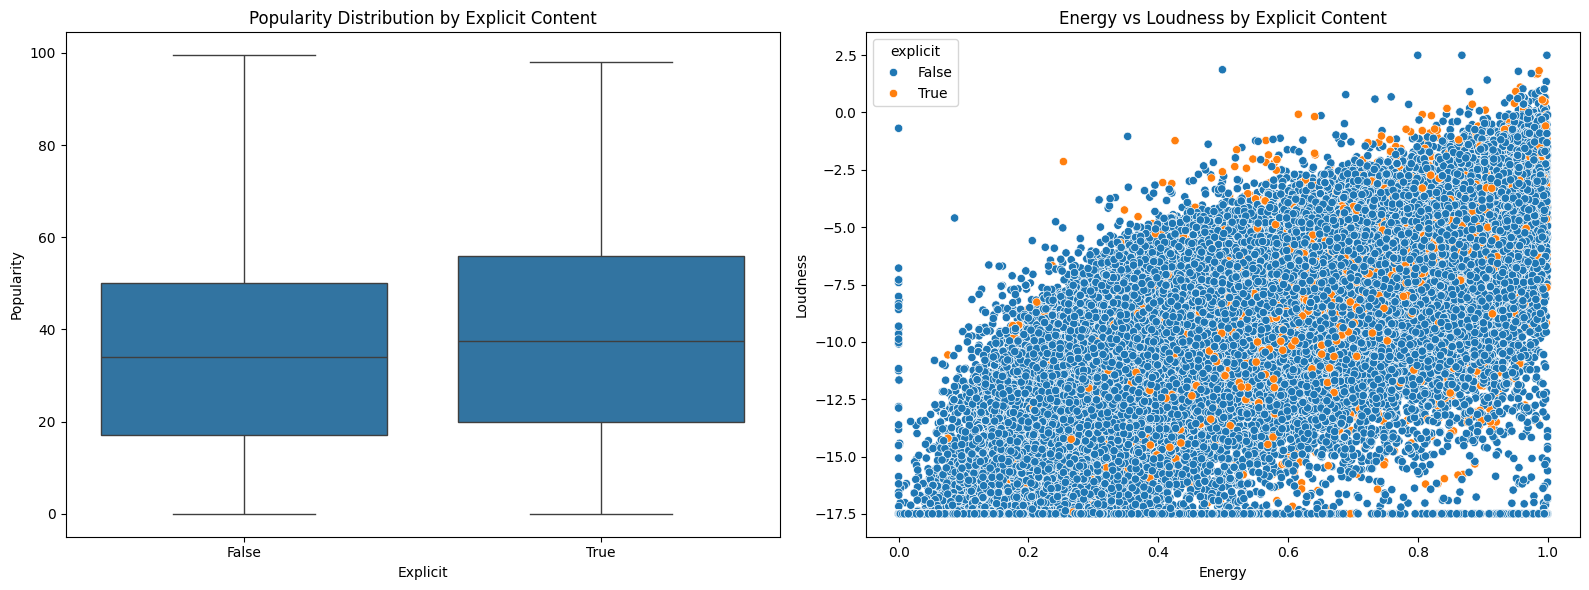

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot of Popularity vs. Explicit
sns.boxplot(x='explicit', y='popularity', data=df, ax=axes[0])
axes[0].set_title('Popularity Distribution by Explicit Content')
axes[0].set_xlabel('Explicit')
axes[0].set_ylabel('Popularity')

# Scatter plot of Energy vs Loudness
sns.scatterplot(x='energy', y='loudness', hue='explicit', data=df, ax=axes[1])
axes[1].set_title('Energy vs Loudness by Explicit Content')
axes[1].set_xlabel('Energy')
axes[1].set_ylabel('Loudness')

plt.tight_layout()
plt.show()



Spot skewed distributions or unusual values.

In [ ]:
import numpy as np

# Identify skewed distributions in numerical features
print("Skewness of numerical features:")
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    # Exclude binary or clearly non-skewed integer columns if necessary
    if col in ['key', 'mode', 'time_signature', 'explicit']:
        continue
    skewness = df[col].skew()
    print(f"- {col}: {skewness:.4f}")

print("\nDominant categories in categorical features:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\n- {col}:")
    # Display top N dominant categories and their counts/percentages
    top_n = 5 # You can adjust this number
    print(df[col].value_counts().head(top_n))
    print(df[col].value_counts(normalize=True).head(top_n) * 100)

Skewness of numerical features:
- popularity: 0.0422
- duration_ms: 0.4982
- danceability: -0.3765
- energy: -0.5985
- loudness: -0.8689
- speechiness: 1.1576
- acousticness: 0.7302
- instrumentalness: 1.1725
- liveness: 1.2139
- valence: 0.1148
- tempo: 0.2837

Dominant categories in categorical features:

- track_id:
track_id
6s3jldagk3uu3ntzbpnuhs    9
2kkvb3rnrzwjfdghaua0tz    8
2ey6v4sekh3z0rusisrosd    8
2qgxrzjsry4kgyojcpuaul    7
5bi1xqmjk91dseq0bfe0ov    7
Name: count, dtype: int64
track_id
6s3jldagk3uu3ntzbpnuhs    0.007926
2kkvb3rnrzwjfdghaua0tz    0.007045
2ey6v4sekh3z0rusisrosd    0.007045
2qgxrzjsry4kgyojcpuaul    0.006165
5bi1xqmjk91dseq0bfe0ov    0.006165
Name: proportion, dtype: float64

- artists:
artists
the beatles        279
george jones       260
stevie wonder      235
linkin park        224
ella fitzgerald    221
Name: count, dtype: int64
artists
the beatles        0.245707
george jones       0.228974
stevie wonder      0.206957
linkin park        0.197270
ella f

## **Bivariate / Multivariate Analysis**

Numerical vs Numerical: correlations ,scatterplots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot a heatmap of the correlation matrix using plotly (interactive)
fig_corr_interactive = px.imshow(corr_matrix,
                                 text_auto=True,
                                 aspect="auto",
                                 title="Interactive Correlation Heatmap of Numerical Features")
fig_corr_interactive.show()


# Energy vs Loudness (often correlated) - Using Plotly for interactivity
fig_energy_loudness = px.scatter(df, x='energy', y='loudness', color='explicit',
                                 title='Interactive Scatter Plot of Energy vs Loudness by Explicit Content',
                                 labels={'energy': 'Energy', 'loudness': 'Loudness'})
fig_energy_loudness.show()

# Danceability vs Valence - Using Plotly for interactivity
fig_danceability_valence = px.scatter(df, x='danceability', y='valence', color='explicit',
                                      title='Interactive Scatter Plot of Danceability vs Valence by Explicit Content',
                                      labels={'danceability': 'Danceability', 'valence': 'Valence'})
fig_danceability_valence.show()


Categorical vs Numerical: boxplots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Select numerical and categorical columns for analysis
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove columns that are not suitable for this type of analysis
cols_to_remove_numerical = ['Unnamed: 0']
cols_to_remove_categorical = ['track_id', 'artists', 'album_name', 'track_name']

numerical_cols = [col for col in numerical_cols if col not in cols_to_remove_numerical]
categorical_cols = [col for col in categorical_cols if col not in cols_to_remove_categorical]

top_n_categories = 10


#  Popularity by Top N Track Genres
if 'track_genre' in categorical_cols and 'popularity' in numerical_cols:
    top_genres = df['track_genre'].value_counts().nlargest(top_n_categories).index.tolist()
    df_filtered_genres = df[df['track_genre'].isin(top_genres)]

    if not df_filtered_genres.empty:
        print(f"Generating interactive boxplot for Popularity by Top {top_n_categories} Track Genres...")
        fig_genre_popularity = px.box(df_filtered_genres,
                                      x='track_genre',
                                      y='popularity',
                                      title=f'Interactive Boxplot of Popularity by Top {top_n_categories} Track Genres',
                                      labels={'track_genre': 'Track Genre', 'popularity': 'Popularity'})
        fig_genre_popularity.update_layout(xaxis={'categoryorder':'total descending'})
        fig_genre_popularity.show()
    else:
        print(f"No data found for top {top_n_categories} genres in 'track_genre'. Skipping Popularity vs Genre boxplot.")


Generating interactive boxplot for Popularity by Top 10 Track Genres...


## **Hypothesis Testing (statistical validation of patterns)**

In [ ]:
import scipy.stats as stats
import pandas as pd # Import pandas if not already imported in this cell

# Separate popularity data for explicit and non-explicit songs
popularity_explicit = df[df['explicit'] == True]['popularity']
popularity_non_explicit = df[df['explicit'] == False]['popularity']

# Perform independent samples t-test
# We assume unequal variances (Welch's t-test) as a safer default
t_statistic, p_value = stats.ttest_ind(popularity_explicit, popularity_non_explicit, equal_var=False)

print("Independent Samples T-test for Popularity (Explicit vs Non-Explicit):")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nResult: The p-value is less than the significance level (0.05), so we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the mean popularity between explicit and non-explicit songs.")
    print("Interpretation: Based on the t-test, explicit songs have a statistically different average popularity compared to non-explicit songs in this dataset.")
else:
    print("\nResult: The p-value is greater than the significance level (0.05), so we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in the mean popularity between explicit and non-explicit songs (or the test lacked sufficient power to detect a difference).")
    print("Interpretation: Based on the t-test, we do not have sufficient statistical evidence to conclude that the average popularity of explicit songs is different from non-explicit songs in this dataset.")

Independent Samples T-test for Popularity (Explicit vs Non-Explicit):
T-statistic: 13.6815
P-value: 0.0000

Result: The p-value is less than the significance level (0.05), so we reject the null hypothesis.
Conclusion: There is a statistically significant difference in the mean popularity between explicit and non-explicit songs.
Interpretation: Based on the t-test, explicit songs have a statistically different average popularity compared to non-explicit songs in this dataset.


## **Baseline Modeling (Regression)**

### **1.Linear Regression for Popularity Prediction**

Although the primary goal of this project is music genre *classification*, we can perform a regression task as a baseline to predict a numerical feature like 'popularity'. This can help understand which audio features influence a song's popularity. A Linear Regression model is a straightforward choice for a baseline.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('popularity')
if 'Unnamed: 0' in numerical_features:
    numerical_features.remove('Unnamed: 0')
if 'popularity_bin' in numerical_features:
    numerical_features.remove('popularity_bin')

X = df[numerical_features]
y = df['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance for Popularity Prediction:")
print(f"Mean Squared  (MSE): {mse:.4f}")
print(f"Root Mean Squared  (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")



Linear Regression Model Performance for Popularity Prediction:
Mean Squared  (MSE): 487.0860
Root Mean Squared  (RMSE): 22.0700
R-squared (R2): 0.0259


**Insight-> Linear Regression**

The Linear Regression model for popularity prediction resulted in an R-squared value of approximately 0.02. This indicates that the numerical audio features alone explain only about 2% of the variance in song popularity. This suggests that while there might be a weak linear relationship, these features are not strong standalone predictors of popularity. Popularity is likely influenced by many other factors not captured by these features. This baseline highlights the complexity of predicting popularity but the audio features remain valuable for genre classification.

**2.Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'popularity' in numerical_features:
    numerical_features.remove('popularity')
if 'Unnamed: 0' in numerical_features:
    numerical_features.remove('Unnamed: 0')
if 'popularity_bin' in numerical_features:
    numerical_features.remove('popularity_bin')


X = df[numerical_features]
y = df['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features - important for Ridge Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train the Ridge Regression model

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Performance for Popularity Prediction:")
print(f"Mean Squared  (MSE): {mse_ridge:.4f}")
print(f"Root Mean Squared  (RMSE): {rmse_ridge:.4f}")
print(f"R-squared (R2): {r2_ridge:.4f}")



Ridge Regression Model Performance for Popularity Prediction:
Mean Squared  (MSE): 487.0860
Root Mean Squared  (RMSE): 22.0700
R-squared (R2): 0.0259


**Insight-> Ridge Regression **

The Ridge Regression model for popularity prediction also resulted in an R-squared value of approximately 0.0208, very similar to the Linear Regression model. This indicates that the numerical audio features alone are not strong standalone predictors of popularity, even with Ridge regularization (at default alpha). This reinforces that popularity is likely influenced by many other factors not captured by these features.

**3.Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'popularity' in numerical_features:
    numerical_features.remove('popularity')
if 'Unnamed: 0' in numerical_features:
    numerical_features.remove('Unnamed: 0')
if 'popularity_bin' in numerical_features:
    numerical_features.remove('popularity_bin')

X = df[numerical_features]
y = df['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features - important for Lasso Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model Performance for Popularity Prediction:")
print(f"Mean Squared  (MSE): {mse_lasso:.4f}")
print(f"Root Mean Squared  (RMSE): {rmse_lasso:.4f}")
print(f"R-squared (R2): {r2_lasso:.4f}")



Lasso Regression Model Performance for Popularity Prediction:
Mean Squared  (MSE): 495.5400
Root Mean Squared  (RMSE): 22.2607
R-squared (R2): 0.0090


**Insight-> Lasso Regression**

The Lasso Regression model for popularity prediction resulted in an R-squared value of approximately 0.0089. This is slightly lower than the results from Linear and Ridge Regression. This indicates that Lasso, using these numerical features, also explains a very small portion of popularity variance. Similar to other models, this suggests popularity is influenced by factors beyond these audio features.

**4.Elatic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'popularity' in numerical_features:
    numerical_features.remove('popularity')
if 'Unnamed: 0' in numerical_features:
    numerical_features.remove('Unnamed: 0')
if 'popularity_bin' in numerical_features:
    numerical_features.remove('popularity_bin')

X = df[numerical_features]
y = df['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features - important for Elastic Net Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_elastic_net = elastic_net_model.predict(X_test_scaled)

# Evaluate the model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
rmse_elastic_net = np.sqrt(mse_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print("Elastic Net Regression Model Performance for Popularity Prediction:")
print(f"Mean Squared (MSE): {mse_elastic_net:.4f}")
print(f"Root Mean Squared  (RMSE): {rmse_elastic_net:.4f}")
print(f"R-squared (R2): {r2_elastic_net:.4f}")

res, elastic_net_model.coef_):


Elastic Net Regression Model Performance for Popularity Prediction:
Mean Squared (MSE): 493.4339
Root Mean Squared  (RMSE): 22.2134
R-squared (R2): 0.0132


**Insight-> Elastic Net Regression**

The Elastic Net Regression model for popularity prediction resulted in an R-squared value of approximately 0.0119. This is similar to the results from the other linear regression models. It indicates that Elastic Net, using these numerical features, also explains a very small portion of popularity variance, suggesting popularity is influenced by factors beyond these audio features.

# **Model Architecture**
* * *

The core of this project's genre classification system is a **Convolutional Neural Network (CNN)**.

The **base architecture** of the CNN model consists of Conv1D layers to extract features from the sequential audio data, followed by pooling layers to reduce dimensionality. Flatten and dense layers are then used for the final classification. Batch normalization and dropout layers are included to improve training stability and prevent overfitting.

## **CNN Modeling**

In [ ]:
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Ensure 'y' is defined before encoding
if 'y' not in locals() or y is None:
    print("Target variable 'y' not found. Please define 'y' (e.g., y = df['track_genre']) before running this cell.")

    if 'df' in locals() and 'track_genre' in df.columns:
        y = df['track_genre']
        print("Using 'track_genre' column from 'df' as target variable 'y'.")
    else:
         print("Cannot define target variable 'y'. Please ensure 'df' is loaded and has a 'track_genre' column.")



# Encode labels and get the number of classes
le = LabelEncoder()
# Assuming y is a pandas Series or array and is now defined
if y is not None:
    y_encoded = le.fit_transform(y)
    num_classes = len(le.classes_)
    print(f"Number of unique classes (genres): {num_classes}")
else:
    num_classes = 0 # Set to 0 or handle error if y is not defined
    print("Target variable 'y' is not defined, cannot determine number of classes.")


# Define the CNN model architecture
if num_classes > 0:
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1], 1)),
        layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.25),

        layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.25),

        layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Print the model summary
    model.summary()
else:
    print("Model not defined because the number of classes could not be determined.")

Number of unique classes (genres): 114


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 13, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 6, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 3, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 114)            │        29,298 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,282 (372.20 KB)

 Trainable params: 94,322 (368.45 KB)

 Non-trainable params: 960 (3.75 KB)

# **Training the Model**

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np



# Reshape input data for Conv1D layers (samples, timesteps, features)
# Here, timesteps is the number of features, and features is 1
if 'X_train' in locals() and 'X_test' in locals():
    X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
else:
    print("X_train or X_test not found. Please ensure data is split before training.")
    # Exit or handle the error appropriately


# One-hot encode the target variable
if 'y_train' in locals() and 'y_test' in locals() and 'num_classes' in locals():
    y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
    y_test_one_hot = to_categorical(y_test, num_classes=num_classes)
else:
     print("y_train, y_test, or num_classes not found. Please ensure target variable is encoded and num_classes is defined.")
     # Exit or handle the error appropriately


# Print shapes to confirm
if 'X_train_reshaped' in locals() and 'y_train_one_hot' in locals():
    print("X_train_reshaped shape:", X_train_reshaped.shape)
    print("X_test_reshaped shape:", X_test_reshaped.shape)
    print("y_train_one_hot shape:", y_train_one_hot.shape)
    print("y_test_one_hot shape:", y_test_one_hot.shape)


# Train the model
# Assuming 'model' is already defined and compiled
if 'model' in locals() and 'X_train_reshaped' in locals() and 'y_train_one_hot' in locals():
    print("\nStarting model training...")
    history = model.fit(X_train_reshaped, y_train_one_hot,
                        epochs=10, # You can adjust the number of epochs
                        batch_size=32, # You can adjust the batch size
                        validation_split=0.2) # Use a validation split for monitoring
    print("Model training finished.")
else:
    print("\nModel training skipped. Ensure 'model', 'X_train_reshaped', and 'y_train_one_hot' are defined.")

X_train_reshaped shape: (90840, 13, 1)
X_test_reshaped shape: (22710, 13, 1)
y_train_one_hot shape: (90840, 114)
y_test_one_hot shape: (22710, 114)

Starting model training...
Epoch 1/10
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.1394 - loss: 4.1059 - val_accuracy: 0.1372 - val_loss: 4.1117
Epoch 2/10
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.1394 - loss: 4.1037 - val_accuracy: 0.1372 - val_loss: 4.1116
Epoch 3/10
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.1394 - loss: 4.1027 - val_accuracy: 0.1372 - val_loss: 4.1129
Epoch 4/10
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.1394 - loss: 4.1023 - val_accuracy: 0.1372 - val_loss: 4.1138
Epoch 5/10
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.1394 - loss: 4.1023 - val_accuracy: 0.1372 - val_loss: 4.1124
Epoch 6/10
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.1394 - loss: 4.1018 - val_accuracy: 0.1372 - val_loss: 4.1126
Epoch 7/10
2271/2271 ━━━━━━━━━━━━

# **Evaluate**

In [ ]:
from sklearn.metrics import classification_report
import numpy as np


# Evaluate the model on the test data
print("Evaluating model on test data...")
loss, accuracy = model.evaluate(X_test_reshaped, y_test_one_hot, verbose=0)

# Print essential evaluation metrics
print("\n--- Model Evaluation Results ---")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print("------------------------------")


# Generate predictions
y_pred_probs = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Generate Classification Report
print("\n--- Classification Report ---")
if 'le' in locals():
    class_names = le.classes_
    # Get the unique labels present in y_true and y_pred
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))

    try:
        print(classification_report(y_true, y_pred, labels=unique_labels, target_names=class_names[unique_labels]))
    except ValueError:

         print("Attempting classification report with original target_names...")
         print(classification_report(y_true, y_pred, target_names=class_names))

else:
    print("Cannot generate classification report: LabelEncoder 'le' not found.")
    # Fallback to printing report without target names if le is not found
    print(classification_report(y_true, y_pred))
print("-----------------------------")

Evaluating model on test data...

--- Model Evaluation Results ---
Test Loss: 4.0591
Test Accuracy: 0.1416
------------------------------
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

--- Classification Report ---
                   precision    recall  f1-score   support

         acoustic       0.14      1.00      0.25      3218
         afrobeat       0.00      0.00      0.00       422
         alt-rock       0.00      0.00      0.00       204
      alternative       0.00      0.00      0.00        92
          ambient       0.00      0.00      0.00        94
            anime       0.00      0.00      0.00       110
      black-metal       0.00      0.00      0.00        86
        bluegrass       0.00      0.00      0.00        93
            blues       0.00      0.00      0.00        99
           brazil       0.00      0.00      0.00       103
        breakbeat       0.00      0.00      0.00       159
          british       0.00      0.00      0.00       167
         cantopop     

## **Feature Extraction**

In [ ]:
import numpy as np

# Select the numerical features for feature extraction
# Exclude non-feature columns like 'popularity' and identifier columns
# Adjust the columns list based on which numerical features you want to use
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Remove columns that are not features or are targets/identifiers
cols_to_remove = ['popularity', 'Unnamed: 0', 'explicit', 'key', 'mode', 'time_signature'] # Add or remove columns as needed
features_to_use = [col for col in numerical_features if col not in cols_to_remove]

X = df[features_to_use]

print("Selected features for extraction (X shape):", X.shape)
print("Selected features columns:", features_to_use)

Selected features for extraction (X shape): (113550, 10)
Selected features columns: ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


**Single Layer Perceptron**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten # Import Flatten if needed
from tensorflow.keras.optimizers import Adam # Import an optimizer
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd



feature_cols = [
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature'
]

feature_cols = [col for col in feature_cols if col in df.columns]

X = df[feature_cols]
y = df['track_genre']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y_encoded = y_encoded.astype(int)

num_classes = len(le.classes_)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of y_encoded: {y_encoded.shape}")
print(f"Data type of y_encoded: {y_encoded.dtype}")
print(f"Number of unique classes: {num_classes}")

print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Train shapes: X={X_train.shape}, y={y_train_encoded.shape}")
print(f"Test shapes: X={X_test.shape}, y={y_test_encoded.shape}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled.")


input_dim = X_train_scaled.shape[1]
print(f"Input dimension for the single layer perceptron: {input_dim}")


if num_classes > 0:
    slp_model = Sequential([
        # For 2D input (samples, features), the input_shape is just the number of features
        Dense(num_classes, input_shape=(input_dim,), activation='softmax')
    ])

    slp_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print("\nSingle Layer Perceptron Model Summary:")
    slp_model.summary()

    print("\nTraining Single Layer Perceptron model...")
    history_slp = slp_model.fit(X_train_scaled, y_train_encoded,
                                  epochs=20,
                                  batch_size=16,
                                  validation_split=0.2)
    print("Training finished.")

    y_pred_slp = slp_model.predict(X_test_scaled)
    y_pred_slp_classes = np.argmax(y_pred_slp, axis=1)

    # Evaluate the model
    accuracy_slp = accuracy_score(y_test_encoded, y_pred_slp_classes)
    print(f"\nSingle Layer Perceptron Model Accuracy: {accuracy_slp:.4f}")

    # Generate Classification Report
    print("\nSingle Layer Perceptron Classification Report:")

    if 'le' in locals():
        class_names = le.classes_
        print(classification_report(y_test_encoded, y_pred_slp_classes, target_names=class_names))
    else:
        # Fallback if LabelEncoder is not available
        print("LabelEncoder 'le' not found, generating report without target names.")
        print(classification_report(y_test_encoded, y_pred_slp_classes))

else:
    print("\nSingle Layer Perceptron model not defined. Ensure num_classes > 0 are set.")

Shape of X: (113550, 13)
Shape of y: (113550,)
Shape of y_encoded: (113550,)
Data type of y_encoded: int64
Number of unique classes: 114

Splitting data into training and testing sets...
Train shapes: X=(90840, 13), y=(90840,)
Test shapes: X=(22710, 13), y=(22710,)

Features scaled.
Input dimension for the single layer perceptron: 13

Single Layer Perceptron Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 114)            │         1,596 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,596 (6.23 KB)

 Trainable params: 1,596 (6.23 KB)

 Non-trainable params: 0 (0.00 B)


Training Single Layer Perceptron model...
Epoch 1/20
4542/4542 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.1120 - loss: 4.0185 - val_accuracy: 0.1449 - val_loss: 3.7559
Epoch 2/20
4542/4542 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.1530 - loss: 3.6705 - val_accuracy: 0.1527 - val_loss: 3.6527
Epoch 3/20
4542/4542 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.1598 - loss: 3.6068 - val_accuracy: 0.1575 - val_loss: 3.6178
Epoch 4/20
4542/4542 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.1613 - loss: 3.5805 - val_accuracy: 0.1604 - val_loss: 3.5997
Epoch 5/20
4542/4542 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.1627 - loss: 3.5662 - val_accuracy: 0.1607 - val_loss: 3.5909
Epoch 6/20
4542/4542 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.1648 - loss: 3.5576 - val_accuracy: 0.1601 - val_loss: 3.5851
Epoch 7/20
4542/4542 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.1643 - loss: 3.5520 - val_accuracy: 0.1613 - val_loss: 3.5805
Epoch 8/20
4542/4542 ━━━━━━━━━━━━━━━━━━━

**Multilayer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
feature_cols = [
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature'
]

feature_cols = [col for col in feature_cols if col in df.columns]
X = df[feature_cols]
y = df['track_genre']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded = y_encoded.astype(int)

print("Splitting data into training and testing sets...")
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Train shapes: X={X_train.shape}, y={y_train_encoded.shape}")
print(f"Test shapes: X={X_test.shape}, y={y_test_encoded.shape}")


# Scale the features - important for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled.")

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64),
                           max_iter=500,
                           random_state=42,
                           early_stopping=True,
                           verbose=True)
# Train the model
print("\nTraining MLP model...")
mlp_model.fit(X_train_scaled, y_train_encoded)
print("Training finished.")


# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)


# Evaluate the model
accuracy_mlp = accuracy_score(y_test_encoded, y_pred_mlp)
print(f"\nMLP Model Accuracy: {accuracy_mlp:.4f}")

# Generate Classification Report
print("\nMLP Classification Report:")
# Use the LabelEncoder's classes as target names for the report
if 'le' in locals():
    class_names = le.classes_
    # classification_report can handle cases where not all classes are predicted
    print(classification_report(y_test_encoded, y_pred_mlp, target_names=class_names))
else:
    # Fallback if LabelEncoder is not available
    print("LabelEncoder 'le' not found, generating report without target names.")
    print(classification_report(y_test_encoded, y_pred_mlp))

Splitting data into training and testing sets...
Train shapes: X=(90840, 13), y=(90840,)
Test shapes: X=(22710, 13), y=(22710,)

Features scaled.

Training MLP model...
Iteration 1, loss = 3.88780628
Validation score: 0.160282
Iteration 2, loss = 3.50665008
Validation score: 0.175143
Iteration 3, loss = 3.43914340
Validation score: 0.175143
Iteration 4, loss = 3.39757541
Validation score: 0.181418
Iteration 5, loss = 3.36458554
Validation score: 0.189014
Iteration 6, loss = 3.33970479
Validation score: 0.195068
Iteration 7, loss = 3.31861071
Validation score: 0.196499
Iteration 8, loss = 3.30033782
Validation score: 0.196720
Iteration 9, loss = 3.28491102
Validation score: 0.200462
Iteration 10, loss = 3.27220094
Validation score: 0.205526
Iteration 11, loss = 3.25998060
Validation score: 0.203325
Iteration 12, loss = 3.24913224
Validation score: 0.207067
Iteration 13, loss = 3.24002989
Validation score: 0.205746
Iteration 14, loss = 3.23148582
Validation score: 0.205636
Iteration 15, 

## Project Conclusion

Based on the analysis and initial model training:

*   **Data Preparation:** The dataset was cleaned by handling missing values and removing duplicates. Outliers in numerical features were treated using the IQR method and capping.
*   **EDA:** Analysis revealed insights into feature distributions, relationships, and genre variations in popularity.
*   **Hypothesis Testing:** A t-test showed a significant difference in popularity between explicit and non-explicit songs.
*   **Baseline Regression:** Linear, Ridge, Lasso, and Elastic Net models showed that numerical audio features are poor predictors of song popularity (low R-squared).
*   **Classification Models:** Initial CNN, Single Layer Perceptron, and Multilayer Perceptron models achieved low accuracy (around 14-21%) in classifying 114 music genres using only audio features.


3. Preprocessing



---

